# **Autoencoders**

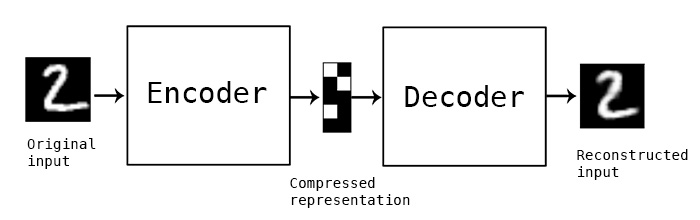

# **Let's build the simplest autoencoder to reconstruct MNIST images**
* ## We define a class AE to be general enough to work on different input, output, and encoding sizes
* ## a single fully-connected neural layer as encoder and as decoder

* ## **Activation function:** for the last layer depends on the input data:
> ###  if they are in [0,1] --> sigmoid
> ###  if they are in [-1,1] --> tanh
> ### if they are in other ranges ---> linear, ReLU etc.
* ## **LOSS**: for this application, with grayscale images, we use a MSE loss with sigmoid activation

In [1]:
import tensorflow.keras as K
from tensorflow.keras import layers

# one Fully-Connected layer encoder
# ENCODING_DIM: This is the size of our encoded representations
def enc(INPUT_SHAPE, ENCODING_DIM):
    return K.Sequential([
            layers.Input(shape=(INPUT_SHAPE,)),
            ### here can add other hidden layers
            layers.Dense(ENCODING_DIM, activation='relu')
    ])


def dec(OUTPUT_SHAPE, ENCODING_DIM, out_activation='sigmoid'):
    return K.Sequential([
        # here can add other hinned layers
        layers.Dense(OUTPUT_SHAPE, input_shape=(ENCODING_DIM,),
                          activation=out_activation)
    ])

class AE(K.Model):
  def __init__(self, INPUT_SHAPE, ENCODING_DIM,
               enc_model, dec_model, out_activation='sigmoid'):
    super(AE, self).__init__()
    #############################################
    #----------ENCODER--------------------------#
    # input here 784-dimensional
    self.encoder = enc_model(INPUT_SHAPE,ENCODING_DIM)
    # output here 32-dimensional
    #############################################
    #----------DECODER--------------------------#
    # input here 32-dimensional
    self.decoder = dec_model(INPUT_SHAPE, ENCODING_DIM, out_activation)

# method to encode images
  def getEncodedImage(self, image):
        encoded_image = self.encoder.predict(image)
        return encoded_image
# method to decode images
  def getDecodedImage(self, encoded_imgs):
      decoded_image = self.decoder.predict(encoded_imgs)
      return decoded_image

  def call(self, input):
    out_encoder = self.encoder(input)
    out_decoder = self.decoder(out_encoder)
    return out_decoder




# **Now let's train the autoencoder to reconstruct MNIST digit**

* ## Since we use a MLP, we need to vectorize the input
* ## First, we configure our model to use a per-pixel binary crossentropy loss
* ## We normalize all pixel values between 0 and 1 and flatten the 28x28 images into vectors of size 784.
* ## Being images and output in [0,1], we can use both mse and binary_crossentropy as loss function




In [2]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)
# normalizing
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# MLP receives vectors as inputs
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


# **Creating the model**
* ## We use an undercomplete autoencoder
* ## Using an embedding dimension 32, we get a compression of factor 24.5%, assuming the input is 784
* ## ## **Be aware**: We use the test data without extracting a validation set because we are not performing any model selection

In [4]:
# This is the size of our encoded representations
ENCODING_DIM = 32
input_shape = x_train.shape[1] # mnist flatten img

autoenc = AE(input_shape,
                  ENCODING_DIM,
                  enc,
                  dec,
                  out_activation='sigmoid')

lr = 10**-3
autoenc.compile(optimizer=K.optimizers.Adam(learning_rate=lr),
                loss='mse')
                #loss='binary_crossentropy')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
epochs = 50
batch_size=256
autoenc.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1076 - val_loss: 0.0409
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0380 - val_loss: 0.0294
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0280 - val_loss: 0.0233
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0224 - val_loss: 0.0192
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0188 - val_loss: 0.0164
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0163 - val_loss: 0.0146
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0146 - val_loss: 0.0133
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0133 - val_loss: 0.0123
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0125 - val_loss: 0.0116
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0118 - val_loss: 0.0111
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0114 - val_loss: 0.0107
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

# **After 50 epochs, the autoencoder seems to reach a stable train/validation loss value of about 0.09**
* ## We can try to visualize the reconstructed inputs and the encoded representations. We will use Matplotlib.

In [ ]:
# Encode and decode test digits, then print some
encoded_imgs = autoenc.getEncodedImage(x_test)
print(encoded_imgs[0:2])
decoded_imgs = autoenc.getDecodedImage(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[ 1.8608758   4.30375     5.8982005   8.775771    2.6451056  10.445076
  10.4620905   2.8726678   7.3833055   5.9959655   6.9150295   2.7699127
   3.893001    7.767845    5.8451333   5.303187    8.723035    3.5289237
   4.8997135   4.871567    7.07615     9.869881   10.682862    1.8371499
   0.52832454  6.051114    2.1635711   4.995408    4.151412    6.732188
  11.763709   11.1534    ]
 [ 9.443418    9.310015    9.83045     5.3689685   3.943816    5.041984
   2.2746346  13.170463    5.126785   12.536245    5.5889707  25.750477
  13.503353    9.05375     8.1147375   9.022186    9.0530615   6.41547
   7.6564674   5.748562    6.1079497   2.4781525  10.333859   19.66015
   1.7326667   3.9978125   1.7035587   3.7922945  14.809691    4.11695
   5.564225    8.899489  ]]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [3]:

import matplotlib.pyplot as plt

def plot_imgs(original, decoded_imgs, n=10):
  # n  How many digits we will display
  plt.figure(figsize=(20, 4))
  for i in range(n):
      # Display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(original[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # Display reconstruction
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(decoded_imgs[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

plot_imgs(x_test, decoded_imgs, n=10)


# **Here's what we get**
* # The top row is the original digits, and the bottom row is the reconstructed digits
* # We are losing some details with this basic approach, although the result is already acceptable

# **Exercise**
* ## Use an autoencoder to learn a compressed representation of one-hot word vectors in the Gutenberg ebook exercise
* ## Then learn recurrent classification model using such the inner representation of the AE as embedding

-------------------------------------------

# **Adding a sparsity constraint on the encoded representations**
 * # So far, the representations were only constrained by the size of the hidden layer ($32$)
 * # Let's add a sparsity contraint on the activity of the hidden representations
* # This can be done via ```activity_regularizer``` argument of ```Dense``` layer, imposing a L1 norm regularization

In [16]:
from tensorflow.keras import regularizers


# one Fully-Connected layer encoder with spersity constraint
# ENCODING_DIM: This is the size of our encoded representations
## Weight: hyperparameter regulating the strenght of the regularization
def sparse_enc(INPUT_SHAPE, ENCODING_DIM, weight=10**-6):
    return K.Sequential([
        layers.Input(shape=(INPUT_SHAPE,)),
            ### here can add other hidden layers
        layers.Dense(ENCODING_DIM,  activation='relu',
                        activity_regularizer=regularizers.l1(weight))
    ])


autoenc_s = AE(input_shape,
                    ENCODING_DIM,
                    sparse_enc,
                    dec,
                    out_activation='sigmoid')

In [ ]:
autoenc_s.compile(optimizer=K.optimizers.Adam(learning_rate=lr),
                  #loss='binary_crossentropy')
                  loss='mse')
epochs = 50
batch_size=256
autoenc_s.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1225 - val_loss: 0.0487
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0459 - val_loss: 0.0394
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0385 - val_loss: 0.0346
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0341 - val_loss: 0.0313
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0310 - val_loss: 0.0288
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0286 - val_loss: 0.0267
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0267 - val_loss: 0.0251
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0253 - val_loss: 0.0239
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0241 - val_loss: 0.0230
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0231 - val_loss: 0.0222
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0224 - val_loss: 0.0215
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

# **After 50 epochs, the autoencoder seems to reach a stable train/validation loss value of about 0.01, slightly higher than before**
* ## Like before, we can try to visualize the reconstructed inputs and the encoded representations.
* ## Moreover, we can also evaluate the effect of spartity regularization by compunting the average magnitude of the activations in the encoded images

In [ ]:
# Encode and decode test digits, and print some
encoded_s_imgs = autoenc_s.getEncodedImage(x_test)
print(encoded_s_imgs[0:2])
decoded_s_imgs = autoenc_s.getDecodedImage(encoded_s_imgs)
print(f"sparse autoencoder mean coded value: {encoded_s_imgs.mean()}")
print(f"Vanilla autoencoder mean coded value:  {encoded_imgs.mean()}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[0.5736784  0.63115335 0.6742678  0.59466517 0.08342385 0.23396273
  0.5464805  0.01714545 0.24290192 0.09755355 0.07192877 0.4836562
  0.         2.3568106  0.72152925 0.4818792  0.00526094 0.09448344
  0.00632456 0.18509805 0.         0.28670812 1.0955297  0.06340238
  0.35795823 0.44647568 0.29065496 0.24852562 0.7911922  0.53070503
  0.11669344 0.2604487 ]
 [0.41657394 0.40687308 0.30090263 0.05772924 0.33985382 0.2684806
  0.3177061  0.         0.1374377  0.18552504 1.8952875  0.
  0.912994   0.         0.8460267  1.1533091  0.5923135  0.19448465
  0.94891393 0.5112072  0.38079107 0.32572436 0.9101771  0.
  0.         0.41411737 1.4920647  1.2387755  0.23185371 0.9131174
  0.18254286 1.3098568 ]]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
sparse autoencoder mean coded value: 0.4686940312385559
Vanilla autoencoder mean coded value:  8.636761665344238


# **The sparse encoder induces representations around 20 times smaller in average magnitude than the dense encoder**


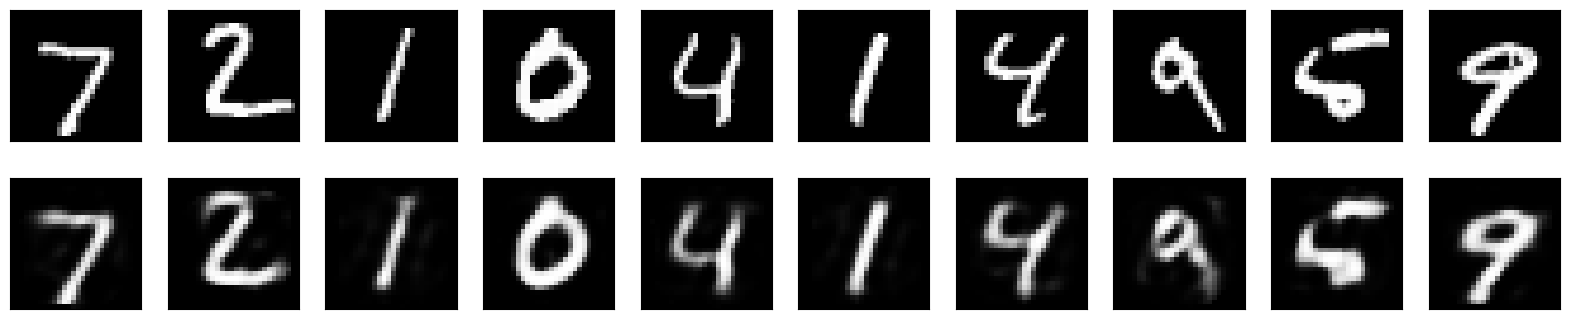

In [ ]:
plot_imgs(x_test, decoded_s_imgs, n=10)

# **They look pretty similar to the previous model**
* ## Although a bit worde than the non sparse counterpart.
* ## But they are more prone to connection pruning
* ## Descreasing the regularization wieght we can trade-off the sparsity and the reconstruction quality


--------------------------------------------

# **EXERCISE**
 * # Train a MLP to classify MNIST digits from the encoded representation
* # Compare the classification performance when using dense encoding and sparse encodings with different levels of sparsity
 * # Also evaluate the impact of the embedding dimension and loss on the performance  

# **SOLUTION**

In [8]:
import tensorflow.keras as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.metrics import accuracy_score
from keras.datasets import mnist
from itertools import product
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

input_shape = x_train.shape[1]
lr = 10**-3
encoding_dims = [16, 32, 64]
ae_losses = ["mse"]

def model_creation(input_shape):
    model = Sequential()
    model.add(Input(shape=(input_shape,)))
    model.add(Dense(32, activation="sigmoid"))
    model.add(Dense(16, activation="sigmoid"))
    model.add(Dense(10, activation="softmax"))

    model.compile(loss = K.losses.SparseCategoricalCrossentropy(),
                  metrics=["accuracy"])
    return model

def classifier_creation_and_evaluation(ae, x_train, y_train, x_test, y_test,
                                       epochs=50, batch_size=256):

    enc_imgs_train = ae.getEncodedImage(x_train)
    enc_imgs_test = ae.getEncodedImage(x_test)
    print(f"enc_imgs_train.shape[1]:{enc_imgs_train.shape[1]}")
    classifier = model_creation(enc_imgs_train.shape[1])
    print(f"\t Fitting the classifier...")
    classifier.fit(enc_imgs_train, y_train, epochs=epochs,
                   batch_size = batch_size,
                   verbose=0)

    print("Test Accuracy:", accuracy_score(y_test, np.argmax(classifier.predict(enc_imgs_test), axis=1)), "\n")




In [13]:
# DENSE
configs = product(encoding_dims, ae_losses)
print(f"configs : {configs}")
epochs = 50
batch_size = 512
for c in configs:
    print(f"Dense encoder with encoding_dim, loss: {c}")
    ae = AE(input_shape, c[0], enc, dec, out_activation='sigmoid')
    ae.compile(optimizer=K.optimizers.Adam(learning_rate=lr), loss=c[1])
    print(f"\t Fitting the AE...")
    ae.fit(x_train, x_train, epochs=epochs, batch_size=batch_size,
           shuffle=True,
           verbose=0)
    classifier_creation_and_evaluation(ae, x_train, y_train, x_test, y_test,
                                       epochs=epochs, batch_size=batch_size)


configs : <itertools.product object at 0x7f00970c5e40>
Dense encoder with encoding_dim, loss: (16, 'mse')
	 Fitting the AE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
enc_imgs_train.shape[1]:16
	 Fitting the classifier...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy: 0.9253 

Dense encoder with encoding_dim, loss: (32, 'mse')
	 Fitting the AE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
enc_imgs_train.shape[1]:32
	 Fitting the classifier...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy: 0.9366 

Dense encoder with encoding_dim, loss: (64, 'mse')
	 Fitting the AE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
enc_imgs_train.shape[1]:64
	 Fitting the classifier...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy: 0.9434 



* # Although we use a suboptimal embedding (few epochs, small coding dimension), the accuracy is still competitive
* # The resulting are improving with the embedding size, it makes sense.

In [17]:
class SparseAE(AE):
  def __init__(self, INPUT_SHAPE,
               ENCODING_DIM,
               enc_model,
               dec_model,
               out_activation='sigmoid',
               enc_weight = 10**-5):
    super(AE, self).__init__()
    self.encoder = enc_model(INPUT_SHAPE,ENCODING_DIM, weight=enc_weight)
    self.decoder = dec_model(INPUT_SHAPE, ENCODING_DIM, out_activation)

# SPARSE
weights = [10**-5, 10**-6, 10**-7]
encoding_dims = [64]
configs = product(encoding_dims, ae_losses, weights)

for c in configs:
    print(f"Sparse encoder with encoding_dim, loss, weight: {c}")

    sae = SparseAE(input_shape, c[0], sparse_enc, dec, out_activation='sigmoid', enc_weight=c[2])
    sae.compile(optimizer=K.optimizers.Adam(learning_rate=lr), loss=c[1])
    print(f"\t Fitting the AE...")
    sae.fit(x_train, x_train, epochs=epochs, batch_size=batch_size,
           shuffle=True,
           verbose=0)
    classifier_creation_and_evaluation(sae, x_train, y_train, x_test, y_test)

Sparse encoder with encoding_dim, loss, weight: (64, 'mse', 1e-05)
	 Fitting the AE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
enc_imgs_train.shape[1]:64
	 Fitting the classifier...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy: 0.1135 

Sparse encoder with encoding_dim, loss, weight: (64, 'mse', 1e-06)
	 Fitting the AE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
enc_imgs_train.shape[1]:64
	 Fitting the classifier...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy: 0.9438 

Sparse encoder with encoding_dim, loss, weight: (64, 'mse', 1e-07)
	 Fitting the AE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
enc_imgs_train.shape[1]:64
	 Fitting the classifier...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy: 0.9567 



* # **Too high sparsity (weight $10^{-5}$) led to very poor results**
* # **Conversely, more mitigated sparsity regularization (weight $10^{-7}$) led to improvements with regard to the non sparse results (test accuracy $0.9434$ with the same encoding dimension**

----------------------------------------------------


# **Convolutional Autoencoders**
 * # Since our inputs are images, it makes sense to use convolutional neural networks as encoders and decoders
 * # Let's implement one. We need to redefine:
 1. # The ```conv_enc``` model a stack of ```Conv2D``` and ```MaxPooling2D``` layers
 > * ## the encoding dimension now is less immediate
 > * ## We need to compute it carefully according to the last convolutional and pooling layer
 2. # ```conv_dec``` model via a stack of ```Conv2D``` and ```UpSampling2D``` (or ```conv2DTranspose```) layers

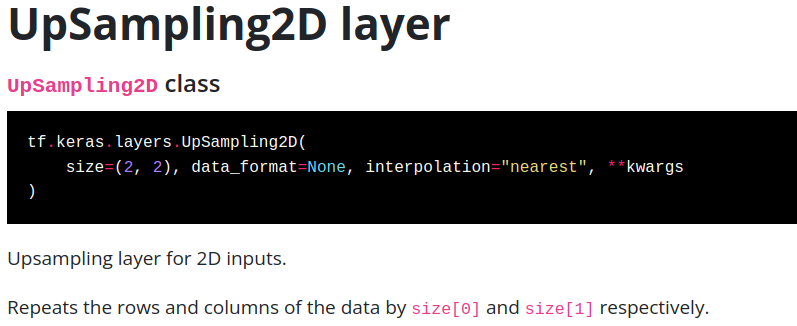

# Let's reshape input images
* ## For convolutional layers we need to add a third dimension to the input: the **number of input channels**

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
input_shape = tuple(x_train.shape[1:])

ENCODING_DIM = 32

# one Fully-Connected layer encoder
# ENCODING_DIM: This is the size of our encoded representations
def conv_enc(INPUT_SHAPE):
    model = K.Sequential([
#      input_img = layers.Input(shape=INPUT_SHAPE)
      layers.Conv2D(16, (3, 3), input_shape=INPUT_SHAPE,
                        activation='relu', padding='same'),
      layers.MaxPooling2D((2, 2), padding='same'),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
      layers.MaxPooling2D((2, 2), padding='same'),
      layers.Conv2D(2, (3, 3), activation='relu', padding='same'),
      layers.MaxPooling2D((2, 2), padding='same'),
      # at this point the representation is (4, 4, 2)
      layers.Flatten()
    ])
    return model

# at this point the representation is 32-dimensional
def conv_dec(ENCODING_DIM, out_activation='sigmoid'):
  model = K.Sequential([
    layers.Reshape((4, 4, 2), input_shape=(ENCODING_DIM,)),
    layers.Conv2D(2, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(1, (3, 3), activation=out_activation,
                  padding='same')
  ])
  return model


class Conv_AE(K.Model):
  def __init__(self, INPUT_SHAPE, ENCODING_DIM,
               enc_model, dec_model, out_activation='sigmoid'):
    super(Conv_AE, self).__init__()
    #############################################
    #----------ENCODER--------------------------#
    # at this point the representation is (28,28,1)-dimensional
    self.encoder = enc_model(INPUT_SHAPE)
    # at this point the representation is 32-dimensional
    #############################################
    #----------DECODER--------------------------#
    self.decoder = dec_model(ENCODING_DIM, out_activation)

# method to encode images
  def getEncodedImage(self, image):
        encoded_image = self.encoder.predict(image)
        return encoded_image
# method to decode images
  def getDecodedImage(self, encoded_imgs):
      decoded_image = self.decoder.predict(encoded_imgs)
      return decoded_image

  def call(self, input):
    out_encoder = self.encoder(input)
    out_decoder = self.decoder(out_encoder)
    return out_decoder

autoenc_conv = Conv_AE(input_shape,
                    ENCODING_DIM,
                    conv_enc,
                    conv_dec,
                    out_activation='sigmoid')



In [ ]:
autoenc_conv.encoder.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 7, 7, 2)        │           146 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 2)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,466 (5.73 KB)

 Trainable params: 1,466 (5.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoenc_conv.decoder.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)             │ (None, 4, 4, 2)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 4, 4, 2)        │            38 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_6 (UpSampling2D)  │ (None, 8, 8, 2)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 8)        │           152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_7 (UpSampling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_8 (UpSampling2D)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,503 (5.87 KB)

 Trainable params: 1,503 (5.87 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lr = 2*10**-4
autoenc_conv.compile(optimizer=K.optimizers.Adam(learning_rate=lr),
                  loss='mse')
epochs = 50
batch_size=256
autoenc_conv.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.1768 - val_loss: 0.0985
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0893 - val_loss: 0.0673
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0627 - val_loss: 0.0555
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0541 - val_loss: 0.0512
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0505 - val_loss: 0.0485
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0479 - val_loss: 0.0456
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0449 - val_loss: 0.0428
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0425 - val_loss: 0.0408
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0406 - val_loss: 0.0389
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0388 - val_loss: 0.0372
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0372 - val_loss: 0.0356
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/ste

# Being smaller then the first autoencoder we created above (around $50k$ versus $3k$), this model does not have accurate results

In [ ]:
# Encode and decode test digits, then print some
encoded_conv_imgs = autoenc_conv.getEncodedImage(x_test)
print(encoded_conv_imgs[0:2])
decoded_conv_imgs = autoenc_conv.getDecodedImage(encoded_conv_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[ 3.6240296   2.1798642   6.0768466   3.3670132   5.066306    3.4627194
   3.6952555   2.6535578   4.89854     0.37538493 10.106716    0.67717236
  10.391798    2.6229775   7.4088345   2.1740494   2.2983284   0.24630678
   7.817834    2.5256834  10.50405     2.8947506   3.4001923   0.
   1.6114253   0.          9.595492    0.          8.0568075   0.
   0.9673318   0.        ]
 [ 3.8751633   0.8751955  11.1654825   3.6921775  10.818726    3.5375335
   2.150209    0.8086658   4.284329    1.1132972  10.896758    4.0799613
  11.420348    2.8391502   1.6808885   2.9179394   4.386796    0.03080101
  12.627902    2.433309   11.247761    3.1404817   9.250765    3.415806
   2.2725306   0.          6.1240377   0.          6.158427    0.
   4.2638297   0.        ]]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


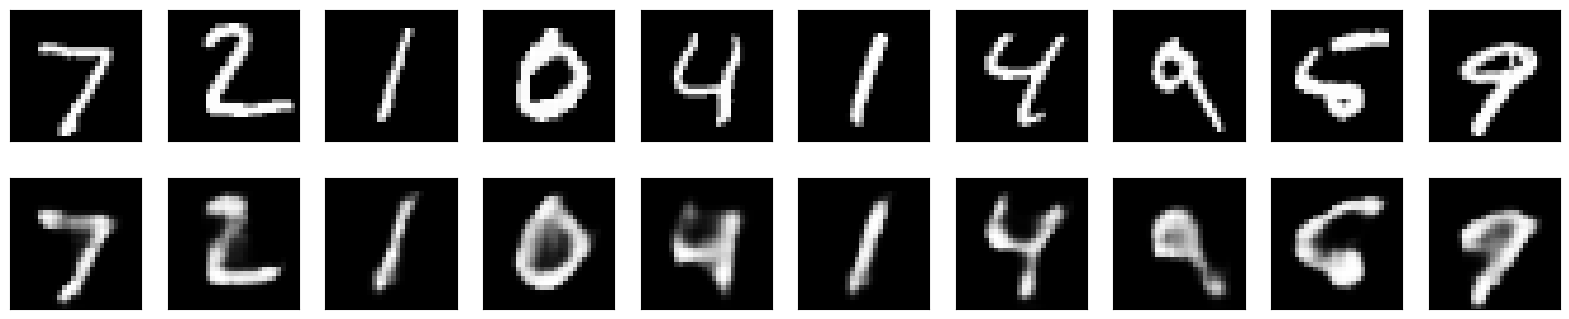

In [ ]:
plot_imgs(x_test, decoded_conv_imgs, n=10)

# **Convolutional autoencoder for image denoising**
 * # We train the autoencoder to map noisy digits images into clean digits images
 * # We inject **noise** by setting to $0$ a given pixel with probability $p$, and leaving as is with probability $1-p$

In [ ]:
# returns a MxN matrix with 0 in i,j-th entry with prob P
def randbin(M,N,P):
    return np.random.choice([0, 1], size=(M,N), p=[P, 1-P])

# Let's define a copy of our training and test data and add noise to them

In [ ]:
x_train_noise = x_train.copy()
x_test_noise = x_test.copy()


In [ ]:
M = x_train.shape[1]
N = x_train.shape[2]
p = 0.5
# setting to 0 the bits in the position where randMat is 0
for i in range(x_train_noise.shape[0]):
  randMat = randbin(M, N, p)
  x_train_noise[i][randMat == 0] = 0
for i in range(x_test_noise.shape[0]):
  randMat = randbin(M, N, p)
  x_test_noise[i][randMat == 0] = 0


# Visualize first $10$ training images with their noisy counterpart

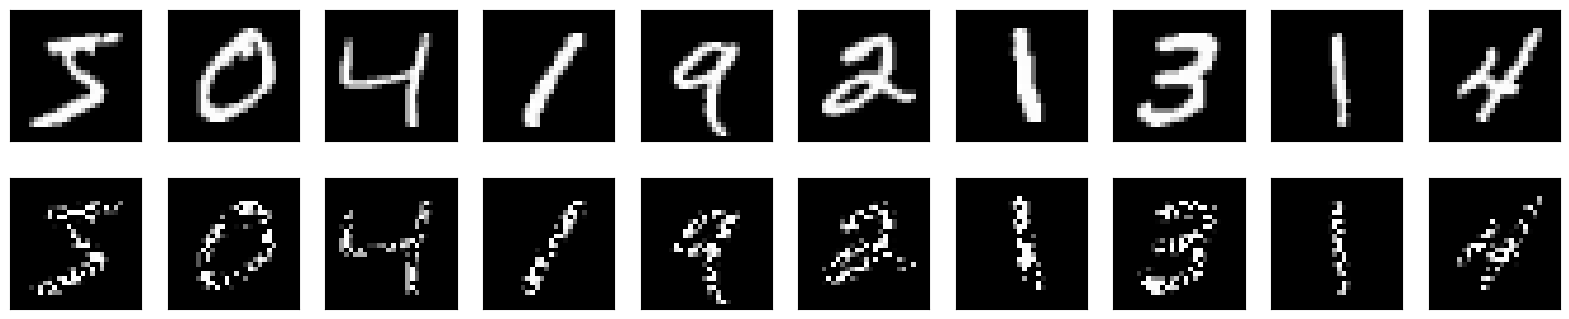

In [ ]:
plot_imgs(x_train, x_train_noise, n=10)

# **Learning the autoencoder to denoise data**
 * # It takes as **input the noisy images**
 * # And **as output is the original images**!

In [ ]:
autoenc_conv_noise = Conv_AE(input_shape,
                    ENCODING_DIM,
                    conv_enc,
                    conv_dec,
                    out_activation='sigmoid')

autoenc_conv_noise.compile(optimizer=K.optimizers.Adam(learning_rate=lr),
                  loss='binary_crossentropy')
epochs = 50
batch_size=256
autoenc_conv_noise.fit(x_train_noise, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test_noise, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.6291 - val_loss: 0.4053
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.3700 - val_loss: 0.2868
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2753 - val_loss: 0.2554
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2479 - val_loss: 0.2233
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2186 - val_loss: 0.2075
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2057 - val_loss: 0.1986
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1975 - val_loss: 0.1920
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1913 - val_loss: 0.1872
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1866 - val_loss: 0.1833
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1825 - val_loss: 0.1799
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1799 - val_loss: 0.1775
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/ste

# Again, the training procedure it is likely did not converge yet

In [ ]:
# Encode and decode test digits, then print some
encoded_noise_imgs = autoenc_conv_noise.getEncodedImage(x_test_noise)
print(encoded_noise_imgs[0:2])
decoded_noise_imgs = autoenc_conv_noise.getDecodedImage(encoded_noise_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[[1.0125427  1.2228757  1.4715996  3.329517   1.177639   2.995444
  0.395863   1.5557235  0.         1.446911   0.         4.0753303
  0.         4.3241277  0.90198445 2.3053489  0.50219166 0.38917428
  0.         3.8745153  0.2361533  4.388919   1.058192   0.53351754
  0.13722605 0.13464075 0.         3.5999413  1.0892869  2.4785461
  0.80056334 0.16417527]
 [0.22699139 1.0518197  0.         4.7434425  0.71947306 4.6427565
  0.26272088 0.6370858  0.         1.381606   0.         4.7304554
  1.355662   4.7090554  0.6179414  0.3355602  0.         1.4895654
  0.         5.4862623  0.         4.2536035  0.         2.8218791
  0.         0.6009234  0.         1.8598219  0.         2.1834667
  0.9835027  0.93574435]]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


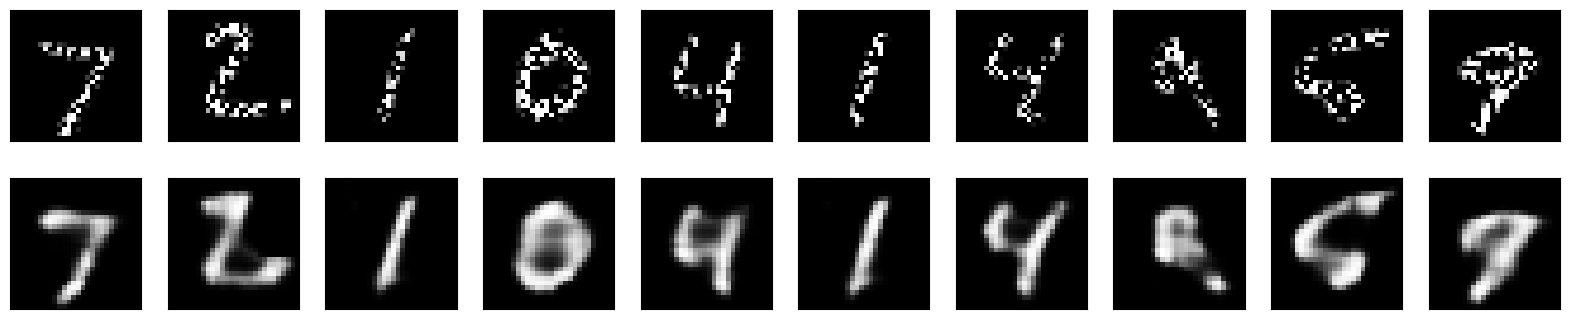

In [ ]:
plot_imgs(x_test_noise, decoded_noise_imgs, n=10)

# The result, like before, are not exciting, the model is too smale, but the noise we injected has been removed
* ## We need to increase the size
# Let's try with an **overcomplete AE**

In [ ]:

ENCODING_DIM = 1024

# one Fully-Connected layer encoder
# ENCODING_DIM: This is the size of our encoded representations
def conv_enc(INPUT_SHAPE):
    model = K.Sequential([
#      input_img = layers.Input(shape=INPUT_SHAPE)
      layers.Conv2D(16, (3, 3), input_shape=INPUT_SHAPE,
                        activation='relu', padding='same'),
      layers.MaxPooling2D((2, 2), padding='same'),
      layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
      layers.MaxPooling2D((2, 2), padding='same'),
      layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
      layers.MaxPooling2D((2, 2), padding='same'),
      # at this point the representation is (4, 4, 64)
      layers.Flatten()
    ])
    return model

# at this point the representation is 1024-dimensional
def conv_dec(ENCODING_DIM, out_activation='sigmoid'):
  model = K.Sequential([
    layers.Reshape((4, 4, 64), input_shape=(ENCODING_DIM,)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(1, (3, 3), activation=out_activation,
                  padding='same')
  ])
  return model

autoenc_conv_noise = Conv_AE(input_shape,
                    ENCODING_DIM,
                    conv_enc,
                    conv_dec,
                    out_activation='sigmoid')
autoenc_conv_noise.compile(optimizer=K.optimizers.Adam(learning_rate=lr),
                  loss='binary_crossentropy')
epochs = 50
batch_size=256
autoenc_conv_noise.fit(x_train_noise, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test_noise, x_test))


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.4552 - val_loss: 0.1813
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1702 - val_loss: 0.1452
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1425 - val_loss: 0.1315
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1306 - val_loss: 0.1237
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1236 - val_loss: 0.1186
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1189 - val_loss: 0.1146
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1151 - val_loss: 0.1121
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1128 - val_loss: 0.1097
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1105 - val_loss: 0.1078
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1089 - val_loss: 0.1063
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1073 - val_loss: 0.1051
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/s

(10000, 28, 28, 1)
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[1.2258118  1.6188252  0.9392241  ... 0.09296626 0.19806269 0.19162631]
 [0.3653152  1.8657038  1.4581616  ... 0.7437452  0.         0.9229519 ]]
(10000, 1024)
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


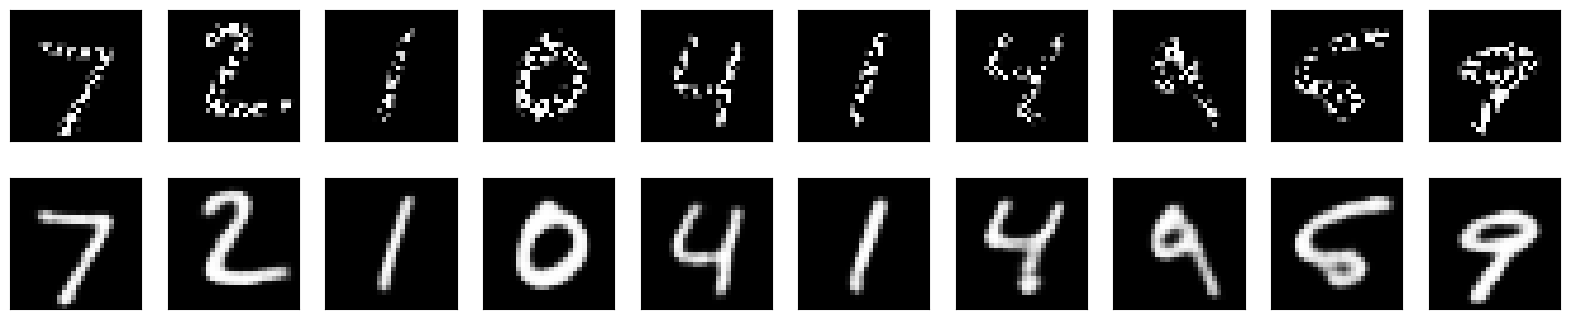

In [ ]:
print(x_test_noise.shape)
# Encode and decode test digits, then print some
encoded_noise_imgs = autoenc_conv_noise.getEncodedImage(x_test_noise)
print(encoded_noise_imgs[0:2])
print(encoded_noise_imgs.shape)
decoded_noise_imgs = autoenc_conv_noise.getDecodedImage(encoded_noise_imgs)
plot_imgs(x_test_noise, decoded_noise_imgs, n=10)

# **Now the result is much better!!**